In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
df = pd.read_csv("Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [6]:
df.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


## Data Cleaning
fix missing values 


In [7]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [8]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [9]:
##check all the catagories 
df["Gender"].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [10]:
df["MaritalStatus"].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [11]:
df["TypeofContact"].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [12]:
df["Gender"] = df["Gender"].replace("Fe Male","Female")
df["MaritalStatus"] = df["MaritalStatus"].replace("Single","Unmarried")

In [13]:
df["Gender"].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [14]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [15]:
#check missing values 
#these are the feature with nan values 
features_with_na = [features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100,5),"% missing values")  # 5 used for Five digits will be taken after the decimal point

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [16]:
#statistics on numerical columns
df[features_with_na].select_dtypes(exclude="object").describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


# imputing null values 
1. Impute Median value for Age column

2. Impute Mode for Type of Contract

3. Impute Median for Duration of Pitch

4. Impute Mode for NumberofFollowup as it is Discrete feature

5. Impute Mode for Preferred PropertyStar

6. Impute Median for NumberofTrips

7. Impute Mode for NumberOfChildren Visiting

8. Impute Median for MonthlyIncome

In [17]:
#age 
df["Age"].fillna(df["Age"].median(), inplace=True)

#Type of Contract 
df["TypeofContact"].fillna(df["TypeofContact"].mode()[0], inplace=True)

#DurationOfPitch
df["DurationOfPitch"].fillna(df["DurationOfPitch"].median(), inplace=True)

#NumberOfFollowups
df["NumberOfFollowups"].fillna(df["NumberOfFollowups"].mode()[0], inplace=True)

#PreferredPropertyStar
df["PreferredPropertyStar"].fillna(df["PreferredPropertyStar"].mode()[0], inplace=True)

#NumberOfTrips
df["NumberOfTrips"].fillna(df["NumberOfTrips"].median(), inplace=True)

#NumberOfChildrenVisiting
df["NumberOfChildrenVisiting"].fillna(df["NumberOfChildrenVisiting"].mode()[0], inplace=True)

#MonthlyIncome
df["MonthlyIncome"].fillna(df["MonthlyIncome"].median(), inplace=True)

In [18]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [19]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [20]:
df.drop("CustomerID", inplace=True, axis=1)

In [21]:
df.head(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# feature engineering 
feature extraction

In [22]:
#create new column for feature
df["TotalVisiting"] = df["NumberOfPersonVisiting"] + df["NumberOfChildrenVisiting"]
df.drop(columns=["NumberOfPersonVisiting", "NumberOfChildrenVisiting"],axis=1, inplace=True)

In [23]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [24]:
#get all the numerical features 
num_features = [feature for feature in df.columns if df[feature].dtype != "O"]
print("number of numerical features is:", len(num_features))

number of numerical features is: 12


In [25]:
#categorical features 
cat_features = [feature for feature in df.columns if df[feature].dtype == "O"]
print("number of categorical feature is:", len(cat_features))

number of categorical feature is: 6


In [26]:
#Discrete features 
discrete_features = [feature for feature in num_features if len(df[feature].unique())<= 25]
print("number of discrete features is:", len(discrete_features))

number of discrete features is: 9


In [27]:
#continuous features 
continuous_features = [feature for feature in num_features if feature not in discrete_features]
print("number of continuous features is:", len(continuous_features))

number of continuous features is: 3


In [28]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


# train test split and model training

In [44]:
from sklearn.model_selection import train_test_split 
X = df.drop(["ProdTaken"], axis=1)
y = df["ProdTaken"]

In [45]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [46]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [47]:
#separate dataset into train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProdTaken               4888 non-null   int64  
 1   Age                     4888 non-null   float64
 2   TypeofContact           4888 non-null   object 
 3   CityTier                4888 non-null   int64  
 4   DurationOfPitch         4888 non-null   float64
 5   Occupation              4888 non-null   object 
 6   Gender                  4888 non-null   object 
 7   NumberOfFollowups       4888 non-null   float64
 8   ProductPitched          4888 non-null   object 
 9   PreferredPropertyStar   4888 non-null   float64
 10  MaritalStatus           4888 non-null   object 
 11  NumberOfTrips           4888 non-null   float64
 12  Passport                4888 non-null   int64  
 13  PitchSatisfactionScore  4888 non-null   int64  
 14  OwnCar                  4888 non-null   

In [49]:
#create column transformers with 3 types of column transformers
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer 

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop="first")

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [50]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [51]:
# applying transformation in training(fit_transform)
X_train = preprocessor.fit_transform(X_train)

In [52]:
X_train

array([[ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.38224537, -0.77415132],
       [ 1.        ,  0.        ,  1.        , ...,  0.78296635,
        -0.4597992 ,  0.64361526],
       [ 1.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.24519557, -0.06526803],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.36057591,  0.64361526],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.25279888,  0.64361526],
       [ 0.        ,  0.        ,  1.        , ..., -1.2771941 ,
        -1.08251091, -1.48303461]])

In [53]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.157926,-0.7214,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.508072,-0.7214,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.396069,-0.7214,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.064073,-0.7214,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.730071,-0.7214,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382


In [54]:
X_test = preprocessor.transform(X_test)

In [41]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.601925,1.455047,-0.287333,1.284279,-0.725271,-1.220627,-0.632399,-0.777720,-1.277194,-0.737510,-0.774151
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.952071,0.366823,-0.531672,0.282777,0.522885,-1.220627,1.581280,1.408395,-1.277194,-0.670411,-0.065268
2,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.046926,1.455047,0.812193,0.282777,-0.725271,0.965153,-0.632399,1.408395,0.782966,-0.420832,-0.774151
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.619072,-0.721400,2.522566,2.285781,-0.725271,1.511598,-0.632399,-0.049015,0.782966,-0.113658,0.643615
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.378923,1.455047,-1.020350,0.282777,0.522885,-0.127737,1.581280,0.679690,0.782966,-0.317047,2.061382


# Random forest classifier training 

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay,\
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [66]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random forest" : RandomForestClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    #model prediction 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #training set performance 
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_roc = roc_auc_score(y_train, y_train_pred)

    #test set performance 
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_roc = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])
    print("model performance for training set")
    print(" -Accuracy:{:.4f}". format(model_train_accuracy))
    print(" -f1_score:{:.4f}". format(model_train_f1))
    print(" -precision_score:{:.4f}". format(model_train_precision))
    print(" -recall_score:{:.4f}". format(model_train_recall))
    print(" -roc_auc_score:{:.4f}". format(model_train_roc))

    print("----------------------------------------------------")

    print("model performance for test set")
    print(" -Accuracy:{:.4f}". format(model_test_accuracy))
    print(" -f1_score:{:.4f}". format(model_test_f1))
    print(" -precision_score:{:.4f}". format(model_test_precision))
    print(" -recall_score:{:.4f}". format(model_test_recall))
    print(" -roc_auc_score:{:.4f}". format(model_test_roc))

    print("="*35)
    print("\n")

Logistic Regression
model performance for training set
 -Accuracy:0.8460
 -f1_score:0.4234
 -precision_score:0.7016
 -recall_score:0.3032
 -roc_auc_score:0.6368
----------------------------------------------------
model performance for test set
 -Accuracy:0.8364
 -f1_score:0.4118
 -precision_score:0.6914
 -recall_score:0.2932
 -roc_auc_score:0.6307


Decision Tree
model performance for training set
 -Accuracy:1.0000
 -f1_score:1.0000
 -precision_score:1.0000
 -recall_score:1.0000
 -roc_auc_score:1.0000
----------------------------------------------------
model performance for test set
 -Accuracy:0.9202
 -f1_score:0.7892
 -precision_score:0.8156
 -recall_score:0.7644
 -roc_auc_score:0.8612


Random forest
model performance for training set
 -Accuracy:1.0000
 -f1_score:1.0000
 -precision_score:1.0000
 -recall_score:1.0000
 -roc_auc_score:1.0000
----------------------------------------------------
model performance for test set
 -Accuracy:0.9294
 -f1_score:0.7837
 -precision_score:0.9766


In [ ]:
#Hyperparameter tuning 
rf_params = {"max_depth": [3,5,2,None,13],
             "max_features":[4,6,"auto",2],
             "min_samples_split":[2,5,7,8],
             "n_estimators":[100,300,500,1000],
             "max_leaf_nodes":[3,5,2,7]}

In [70]:
rf_params

{'max_depth': [3, 5, 2, None, 13],
 'max_features': [4, 6, 'auto', 2],
 'min_samples_split': [2, 5, 7, 8],
 'n_estimators': [100, 300, 500, 1000],
 'max_leaf_nodes': [3, 5, 2, 7]}

In [71]:
#model list for hyperparameter tuning 
randomcv_models =[
    ("RF", RandomForestClassifier(), rf_params),
]

In [72]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [3, 5, 2, None, 13],
   'max_features': [4, 6, 'auto', 2],
   'min_samples_split': [2, 5, 7, 8],
   'n_estimators': [100, 300, 500, 1000],
   'max_leaf_nodes': [3, 5, 2, 7]})]

In [74]:
from sklearn.model_selection import RandomizedSearchCV 

model_param = {}
for name, model, param in randomcv_models:
    random = RandomizedSearchCV(estimator= model,
                                param_distributions= param,
                                n_iter = 10,
                                cv=3,
                                verbose=2,
                                refit= True,
                                n_jobs= -1)
    random.fit(X_train,y_train)
    model_param[name]= random.best_params_

for model_name in model_param:
    print(f"------------------best params for {model_name} --------------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
------------------best params for RF --------------------------
{'n_estimators': 300, 'min_samples_split': 8, 'max_leaf_nodes': 7, 'max_features': 4, 'max_depth': 3}


In [79]:
models = {
    
    "Random forest":RandomForestClassifier(n_estimators=300,min_samples_split=8,max_leaf_nodes=7,max_features=4,max_depth=3)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    #model prediction 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #training set performance 
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_roc = roc_auc_score(y_train, y_train_pred)

    #test set performance 
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_roc = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])
    print("model performance for training set")
    print(" -Accuracy:{:.4f}". format(model_train_accuracy))
    print(" -f1_score:{:.4f}". format(model_train_f1))
    print(" -precision_score:{:.4f}". format(model_train_precision))
    print(" -recall_score:{:.4f}". format(model_train_recall))
    print(" -roc_auc_score:{:.4f}". format(model_train_roc))

    print("----------------------------------------------------")

    print("model performance for test set")
    print(" -Accuracy:{:.4f}". format(model_test_accuracy))
    print(" -f1_score:{:.4f}". format(model_test_f1))
    print(" -precision_score:{:.4f}". format(model_test_precision))
    print(" -recall_score:{:.4f}". format(model_test_recall))
    print(" -roc_auc_score:{:.4f}". format(model_test_roc))

    print("="*35)
    print("\n")

Random forest
model performance for training set
 -Accuracy:0.8161
 -f1_score:0.0271
 -precision_score:1.0000
 -recall_score:0.0137
 -roc_auc_score:0.5069
----------------------------------------------------
model performance for test set
 -Accuracy:0.8057
 -f1_score:0.0206
 -precision_score:0.6667
 -recall_score:0.0105
 -roc_auc_score:0.5046




Training Set Performance with Cross-Validation
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      3181
           1       0.75      0.00      0.01       729

    accuracy                           0.81      3910
   macro avg       0.78      0.50      0.45      3910
weighted avg       0.80      0.81      0.73      3910

Confusion Matrix:
 [[3180    1]
 [ 726    3]]

Test Set Performance with Cross-Validation
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       787
           1       1.00      0.01      0.01       191

    accuracy                           0.81       978
   macro avg       0.90      0.50      0.45       978
weighted avg       0.84      0.81      0.72       978

Confusion Matrix:
 [[787   0]
 [190   1]]


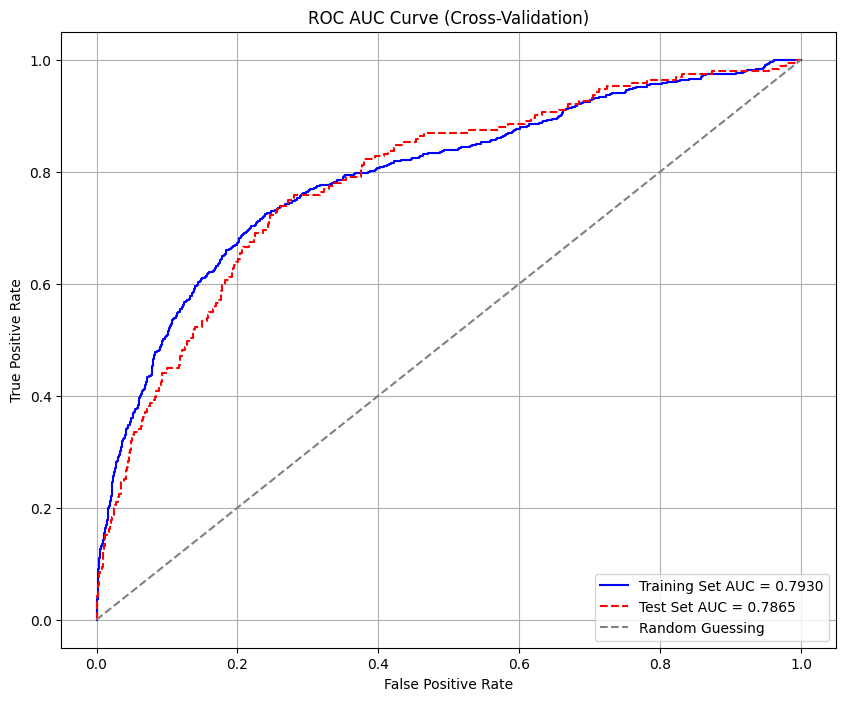

Cross-Validation Scores:
Accuracy: 0.8143 ± 0.0010
F1 Score: 0.0108 ± 0.0157
Precision: 0.2667 ± 0.3432
Recall: 0.0055 ± 0.0080
ROC AUC: 0.7944 ± 0.0163


In [80]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Perform cross-validation predictions
y_train_pred_cv = cross_val_predict(model, X_train, y_train, cv=5, method="predict")
y_test_pred_cv = cross_val_predict(model, X_test, y_test, cv=5, method="predict")

# Precision, Recall, F1-score, Accuracy with cross-validation on training and test sets
print("Training Set Performance with Cross-Validation")
print(classification_report(y_train, y_train_pred_cv))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_cv))

print("\nTest Set Performance with Cross-Validation")
print(classification_report(y_test, y_test_pred_cv))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_cv))

# Plot ROC AUC Curve with cross-validation predictions
y_train_proba_cv = cross_val_predict(model, X_train, y_train, cv=5, method="predict_proba")[:, 1]
y_test_proba_cv = cross_val_predict(model, X_test, y_test, cv=5, method="predict_proba")[:, 1]

train_fpr, train_tpr, _ = roc_curve(y_train, y_train_proba_cv)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_proba_cv)

train_auc = auc(train_fpr, train_tpr)
test_auc = auc(test_fpr, test_tpr)

plt.figure(figsize=(10, 8))
plt.plot(train_fpr, train_tpr, color='blue', label=f'Training Set AUC = {train_auc:.4f}')
plt.plot(test_fpr, test_tpr, color='red', linestyle='--', label=f'Test Set AUC = {test_auc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guessing')
plt.title('ROC AUC Curve (Cross-Validation)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Calculate Mean and Standard Deviation for Cross-Validation Scores
from sklearn.model_selection import cross_val_score

cv_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
cv_f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
cv_precision = cross_val_score(model, X_train, y_train, cv=5, scoring='precision')
cv_recall = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')
cv_auc = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

print("Cross-Validation Scores:")
print(f"Accuracy: {np.mean(cv_accuracy):.4f} ± {np.std(cv_accuracy):.4f}")
print(f"F1 Score: {np.mean(cv_f1):.4f} ± {np.std(cv_f1):.4f}")
print(f"Precision: {np.mean(cv_precision):.4f} ± {np.std(cv_precision):.4f}")
print(f"Recall: {np.mean(cv_recall):.4f} ± {np.std(cv_recall):.4f}")
print(f"ROC AUC: {np.mean(cv_auc):.4f} ± {np.std(cv_auc):.4f}")
